In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:

# Load & Read the Excel file into a dictionary of DataFrames
df = pd.read_excel('Train.xlsx')

# Display the size of the data
print("Shape of the dataset:", df.shape)

Shape of the dataset: (9800, 18)


In [6]:
# Retrieve the first 5 rows
subset = df.head(5)

# Display the subset
print(subset)

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156 2017-11-08 2017-11-11    Second Class    CG-12520   
1       2  CA-2017-152156 2017-11-08 2017-11-11    Second Class    CG-12520   
2       3  CA-2017-138688 2017-06-12 2017-06-16    Second Class    DV-13045   
3       4  US-2016-108966 2016-10-11 2016-10-18  Standard Class    SO-20335   
4       5  US-2016-108966 2016-10-11 2016-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Category Sub-Ca

In [7]:
# Find numerical variables
numerical_vars = df.select_dtypes(include='number').columns.tolist()

# Find categorical variables
categorical_vars = df.select_dtypes(include='object').columns.tolist()

# Display the numerical and categorical variables
print("Numerical variables:")
print(numerical_vars)
print("\nCategorical variables:")
print(categorical_vars)

Numerical variables:
['Row ID', 'Postal Code', 'Sales']

Categorical variables:
['Order ID', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name']


In [10]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:")
print(missing_values)

Missing values:
Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


In [11]:
# Check data types consistency
data_types = df.dtypes
print("\nData types:")
print(data_types)


Data types:
Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
dtype: object


In [12]:
# Drop rows with missing values
df_cleaned = df.dropna()

# Display the size of the cleaned dataset
print("Size of the cleaned dataset:")
print(df_cleaned.shape)

Size of the cleaned dataset:
(9789, 18)


In [13]:
# Detect date format of Order Date
order_date_format = pd.to_datetime(df['Order Date'], format='%d/%m/%Y').dt.strftime('%d/%m/%Y').unique()
print("Order Date format:", order_date_format)

# Detect date format of Ship Date
ship_date_format = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y').dt.strftime('%d/%m/%Y').unique()
print("Ship Date format:", ship_date_format)

Order Date format: ['08/11/2017' '12/06/2017' '11/10/2016' ... '18/06/2015' '28/02/2018'
 '09/05/2016']
Ship Date format: ['11/11/2017' '16/06/2017' '18/10/2016' ... '12/03/2015' '06/04/2018'
 '13/05/2016']


In [14]:
# Calculate Order Processing Time in days
df['Order Processing Time'] = (df['Ship Date'] - df['Order Date']).dt.days

# Display the updated dataset with the Order Processing Time
print(df.head())

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156 2017-11-08 2017-11-11    Second Class    CG-12520   
1       2  CA-2017-152156 2017-11-08 2017-11-11    Second Class    CG-12520   
2       3  CA-2017-138688 2017-06-12 2017-06-16    Second Class    DV-13045   
3       4  US-2016-108966 2016-10-11 2016-10-18  Standard Class    SO-20335   
4       5  US-2016-108966 2016-10-11 2016-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Category Sub-Ca

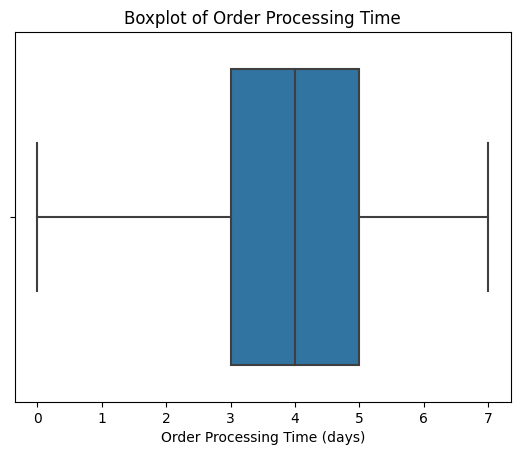

In [16]:
# Find outliers in Order Processing Time
sns.boxplot(x=df['Order Processing Time'])
plt.title("Boxplot of Order Processing Time")
plt.xlabel("Order Processing Time (days)")
plt.show()

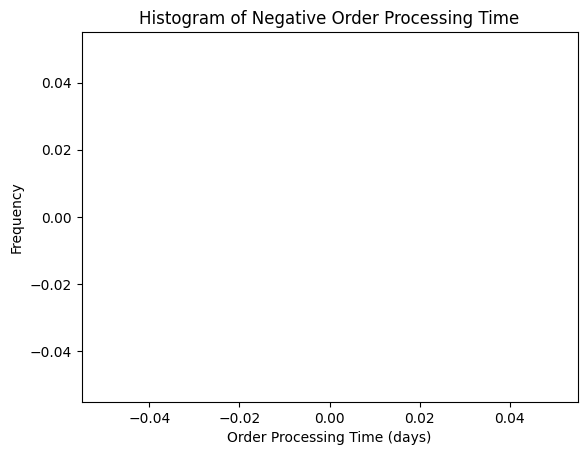

In [21]:
# Check for negative values
negative_values = df[df['Order Processing Time'] < 0]

# Plot the negative values
sns.histplot(data=negative_values, x='Order Processing Time', bins=10)
plt.title("Histogram of Negative Order Processing Time")
plt.xlabel("Order Processing Time (days)")
plt.ylabel("Frequency")
plt.show()

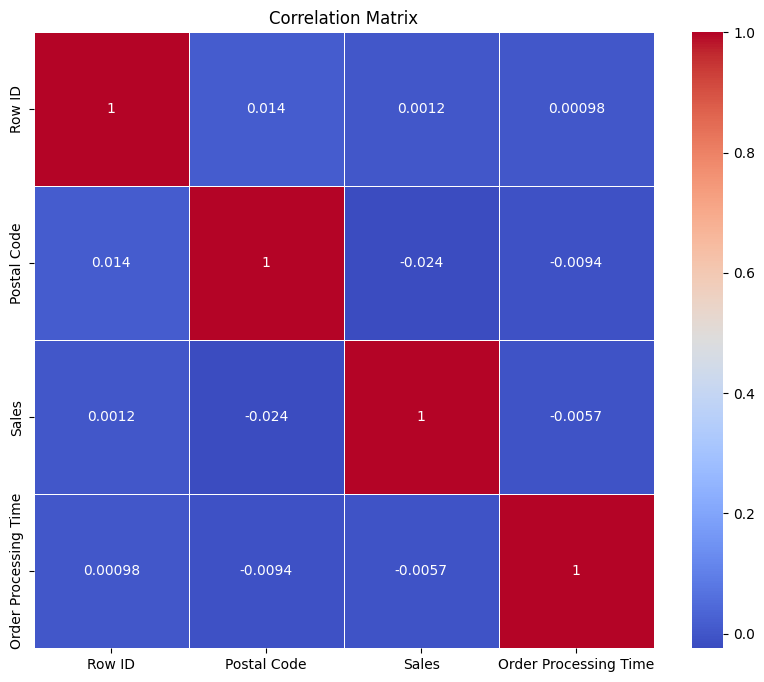

In [22]:
# Select numerical variables including 'Order Processing Time'
numerical_vars.append('Order Processing Time')
numeric_data = df[numerical_vars]

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

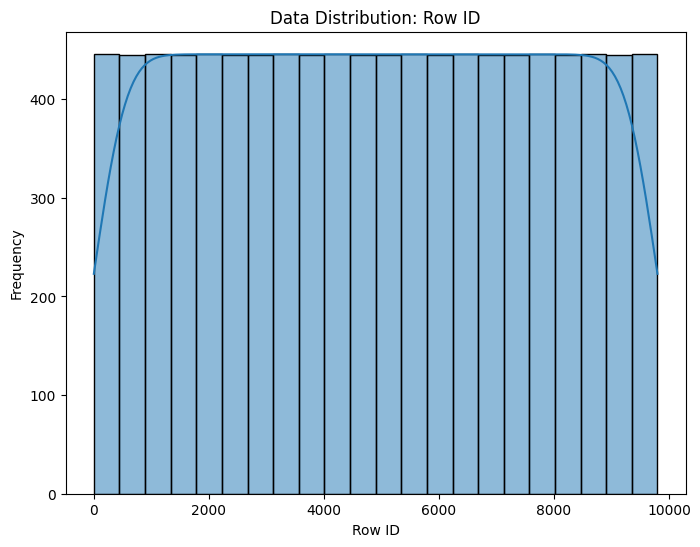

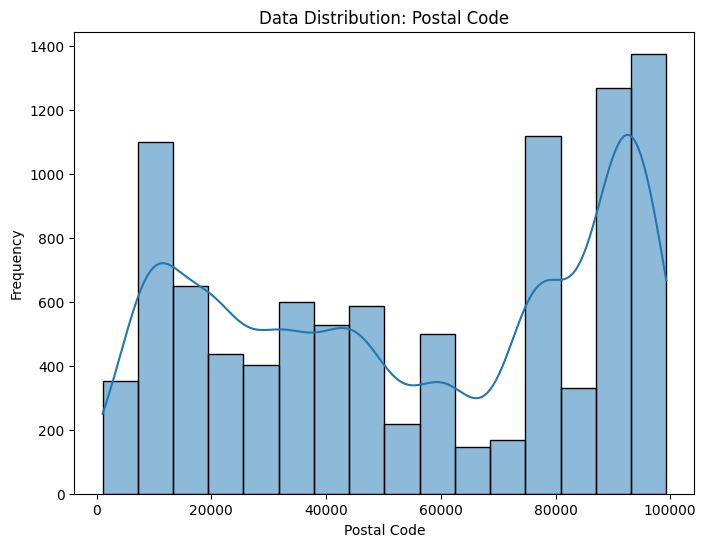

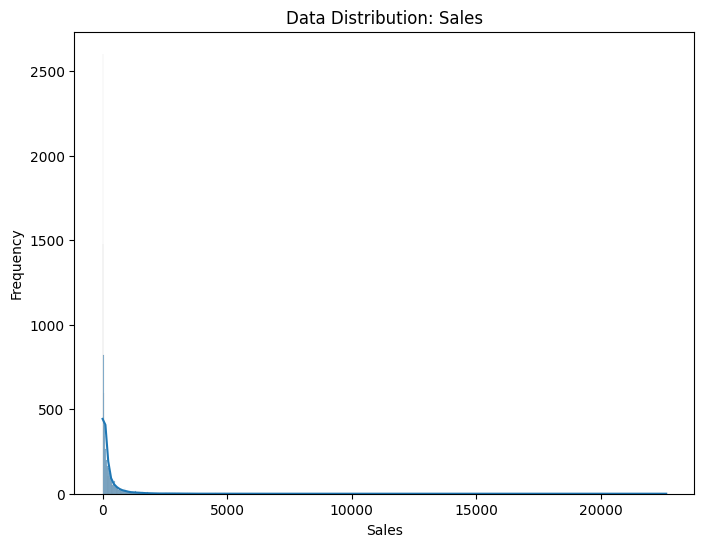

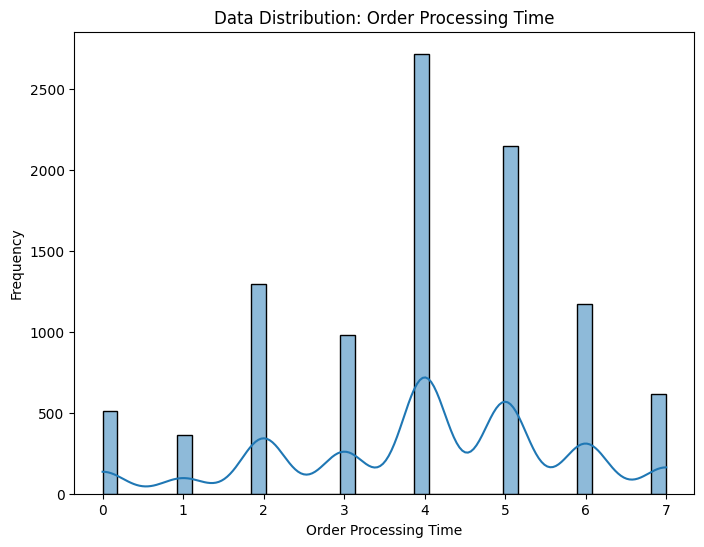

In [23]:
# Select numerical variables
numerical_vars = df.select_dtypes(include='number').columns

# Plot histograms for each column
for column in numerical_vars:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Data Distribution: {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

C:\Users\sialp\AppData\Local\Temp\ipykernel_7952\1199816114.py:16: UserWarning: Glyph 157 (\x9d) missing from current font.
  plt.tight_layout()
C:\Users\sialp\AppData\Local\Temp\ipykernel_7952\1199816114.py:16: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
C:\Users\sialp\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 157 (\x9d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


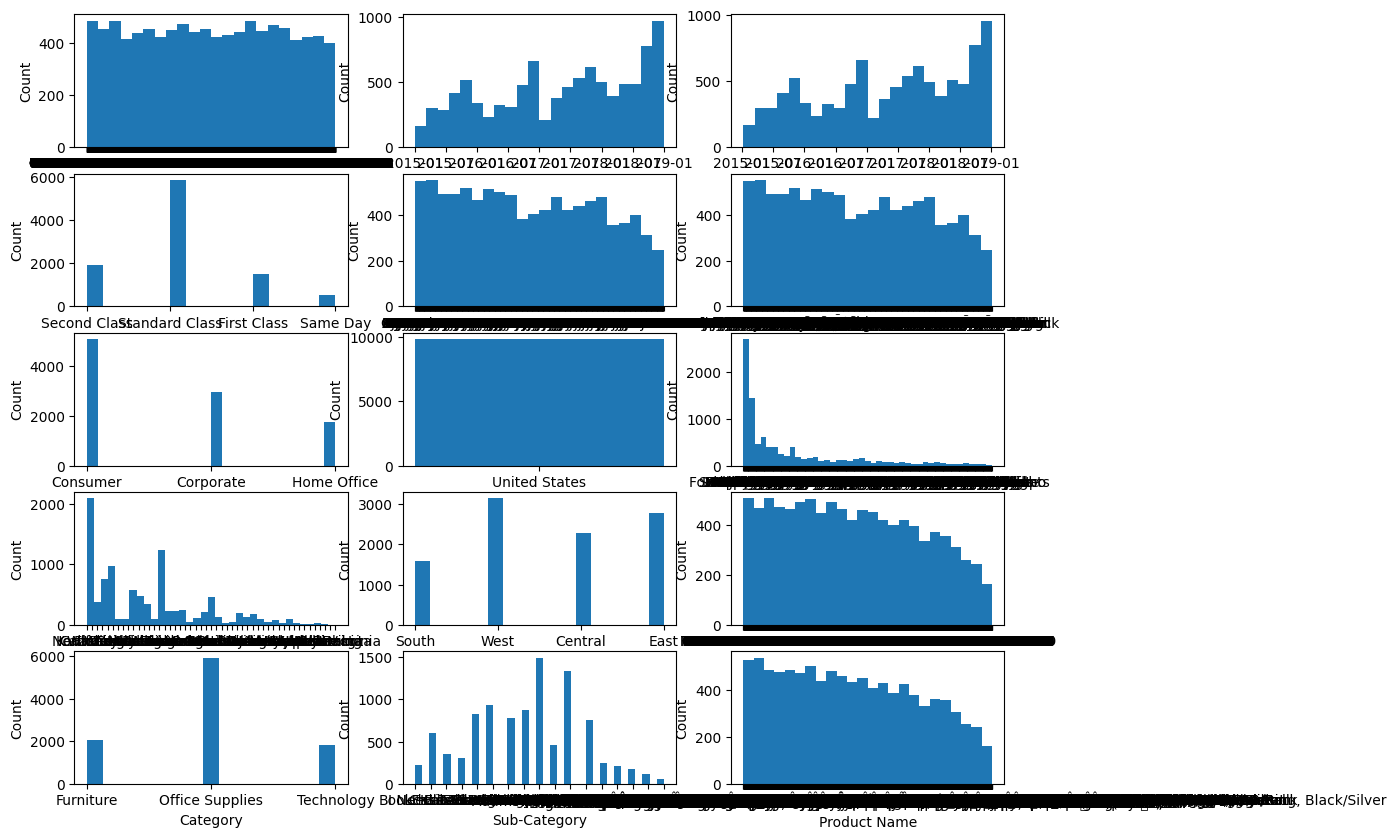

In [99]:

categorical_columns = ['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name',
                       'Segment', 'Country', 'City', 'State', 'Region', 'Product ID', 'Category',
                       'Sub-Category', 'Product Name']

# Set the figure size
plt.figure(figsize=(12, 10))

# Iterate over each categorical column and plot a histogram
for i, column in enumerate(categorical_columns):
    plt.subplot(5, 3, i+1)  # Adjust the subplot layout as per your preference
    plt.hist(df[column].values, bins='auto')
    plt.xlabel(column)
    plt.ylabel('Count')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [29]:
# Extract year from "Order Date" column
df['Year'] = df['Order Date'].dt.year

# Group the data by year
orders_by_year = df.groupby('Year')['Order ID'].count()

# Print the orders by year
print("Orders by Year:")
print(orders_by_year)

Orders by Year:
Year
2015    1953
2016    2055
2017    2534
2018    3258
Name: Order ID, dtype: int64


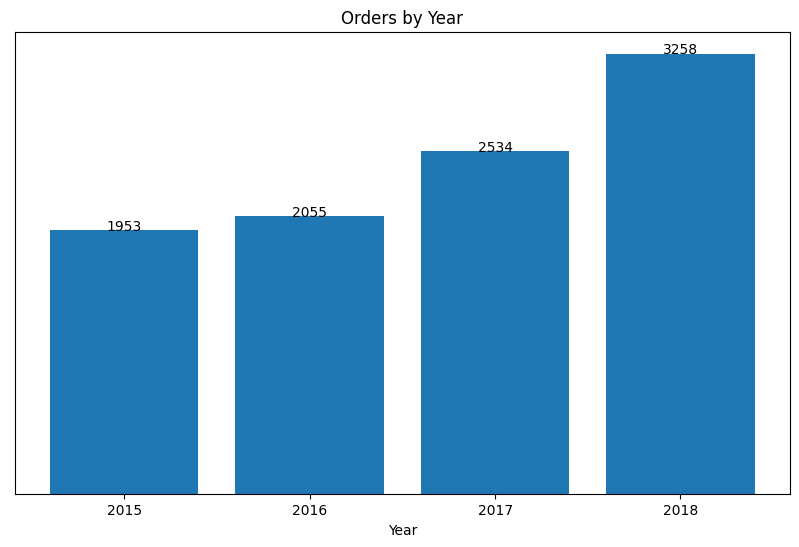

In [31]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the column chart
plt.bar(orders_by_year.index, orders_by_year.values)

# Add data values on top of each column
for i, value in enumerate(orders_by_year.values):
    plt.text(orders_by_year.index[i], value, str(value), ha='center')

# Set the x-axis labels to the years
plt.xticks(orders_by_year.index)

# Hide the y-axis
plt.yticks([])

# Set the title and labels
plt.title('Orders by Year')
plt.xlabel('Year')

# Display the chart
plt.show()

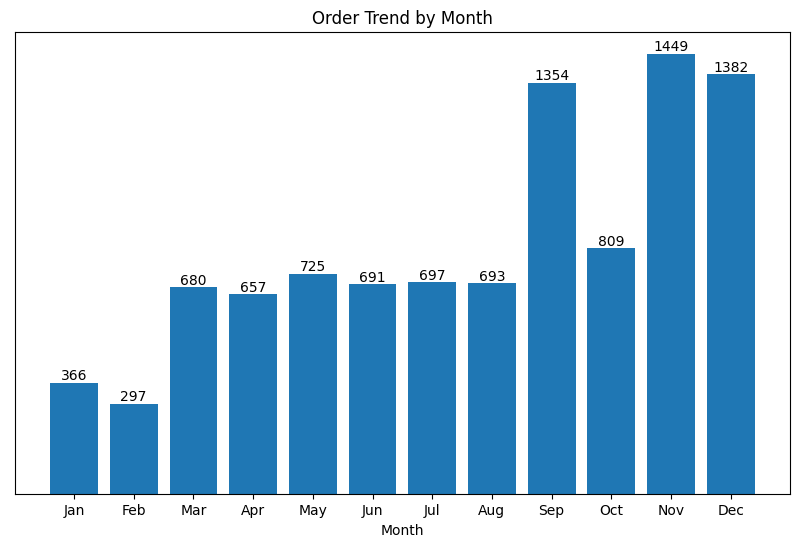

In [35]:
import matplotlib.pyplot as plt
import calendar

# Group the data by month and count the number of orders
orders_by_month = df.groupby(df['Order Date'].dt.month)['Order ID'].count()

# Convert month numbers to short month names
month_names = [calendar.month_abbr[i] for i in orders_by_month.index]

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bar chart
plt.bar(month_names, orders_by_month.values)

# Add data values on top of each bar
for i, value in enumerate(orders_by_month.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Set the title and labels
plt.title('Order Trend by Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')

# Hide the y-axis
plt.gca().axes.get_yaxis().set_visible(False)

# Display the chart
plt.show()

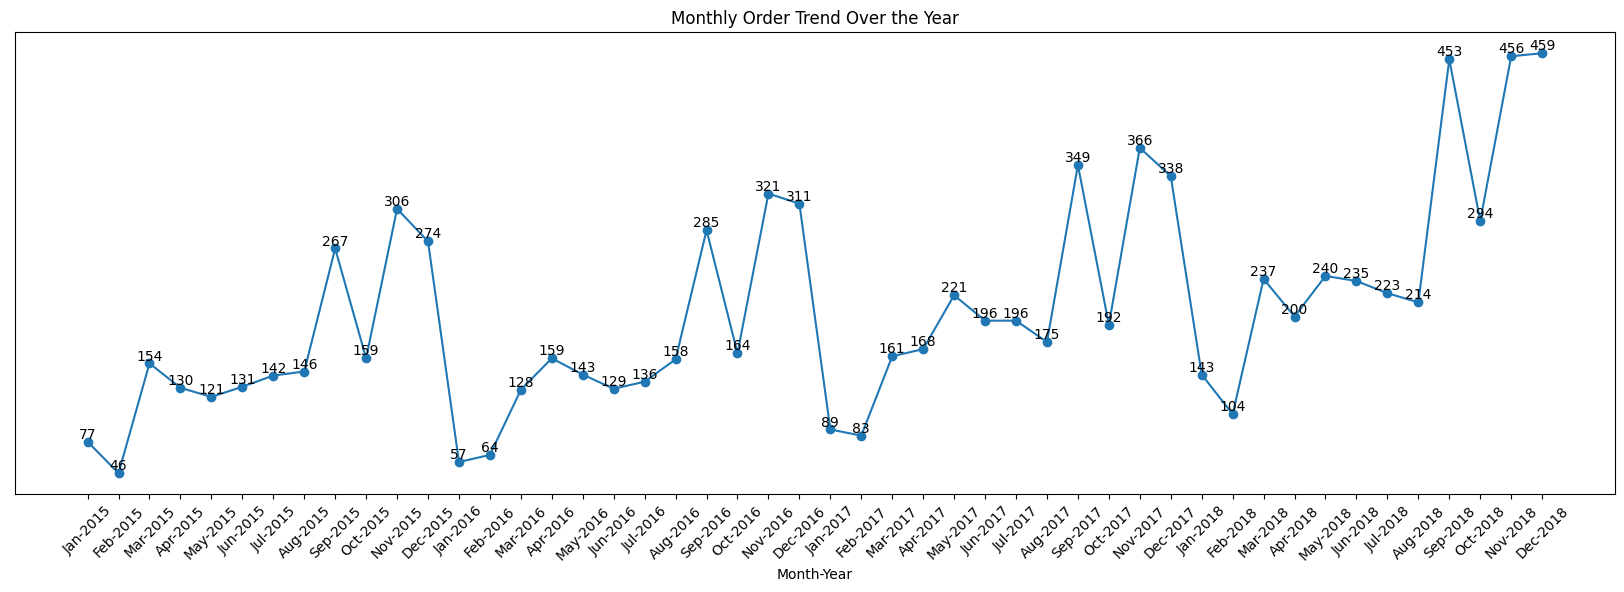

In [42]:
import calendar

# Group the data by year and month and count the number of orders
orders_by_month = df.groupby([df['Order Date'].dt.year, df['Order Date'].dt.month])['Order ID'].count()

# Create a list of month-year labels in the format 'Jan-2022'
month_year_labels = [f"{calendar.month_abbr[month]}-{year}" for year, month in orders_by_month.index]

# Set the figure size and margins
plt.figure(figsize=(20, 6))
plt.subplots_adjust(left=0.1, right=0.9)

# Create the line chart
plt.plot(month_year_labels, orders_by_month.values, marker='o')

# Add data values on top of each data point
for i, value in enumerate(orders_by_month.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Set the title and labels
plt.title('Monthly Order Trend Over the Year')
plt.xlabel('Month-Year')
plt.ylabel('Number of Orders')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Hide the y-axis
plt.gca().axes.get_yaxis().set_visible(False)

# Display the chart
plt.show()

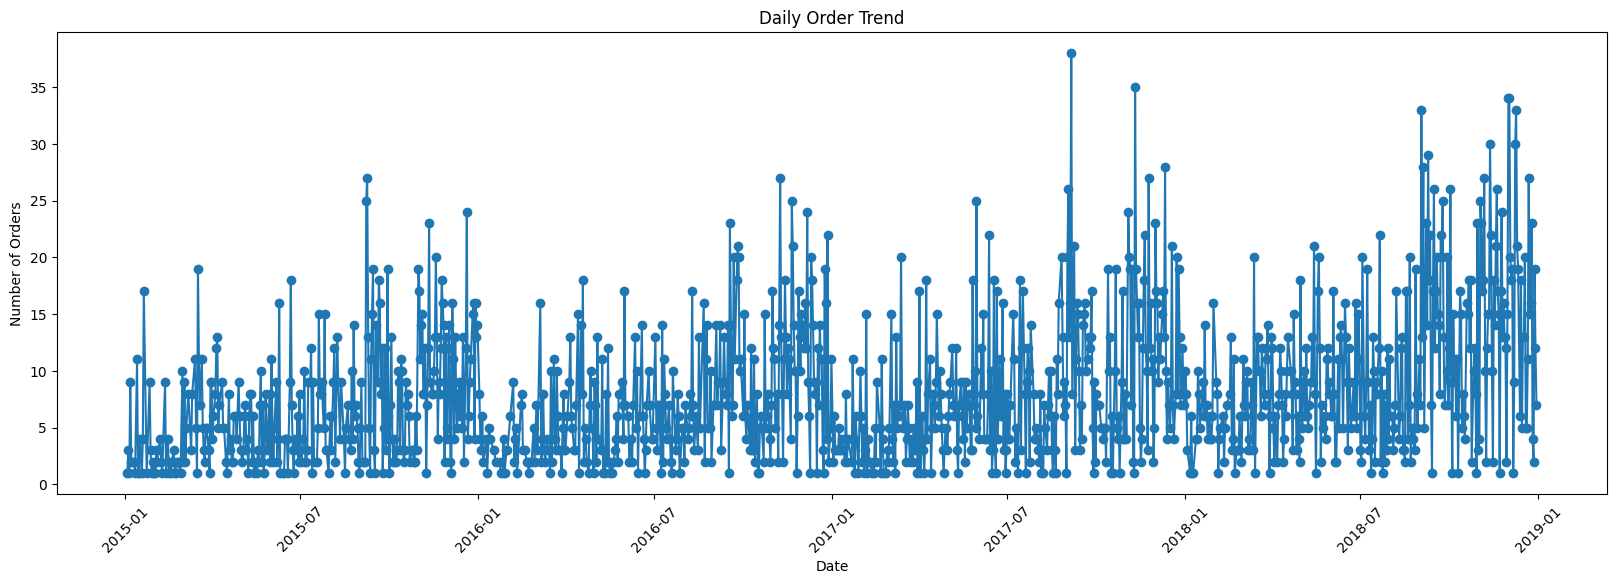

2018-12-31: 12
2019-01-01: 12
2019-01-02: 12
2019-01-03: 12
2019-01-04: 12
2019-01-05: 12
2019-01-06: 12


In [55]:
from datetime import datetime, timedelta

# Group the data by order date and count the number of orders for each day
orders_by_day = df.groupby(df['Order Date'].dt.date)['Order ID'].count()

# Create a line chart to visualize the daily order trend
plt.figure(figsize=(20, 6))
plt.plot(orders_by_day.index, orders_by_day.values, marker='o')
plt.title('Daily Order Trend')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

# Get the last date in the dataset
last_date = orders_by_day.index[-1]

# Generate the next 7 days of dates
future_dates = pd.date_range(last_date + timedelta(days=1), periods=7, freq='D')

# Predict the future order values using historical data
predicted_orders = []
for date in future_dates:
    # Calculate the average orders from the last 7 days
    average_orders = orders_by_day[-7:].mean()
    # Add the average orders to the predicted orders list
    predicted_orders.append(round(average_orders))

# Print the predicted order values
for i, date in enumerate(future_dates):
    print(f"{date.date()}: {predicted_orders[i]}")

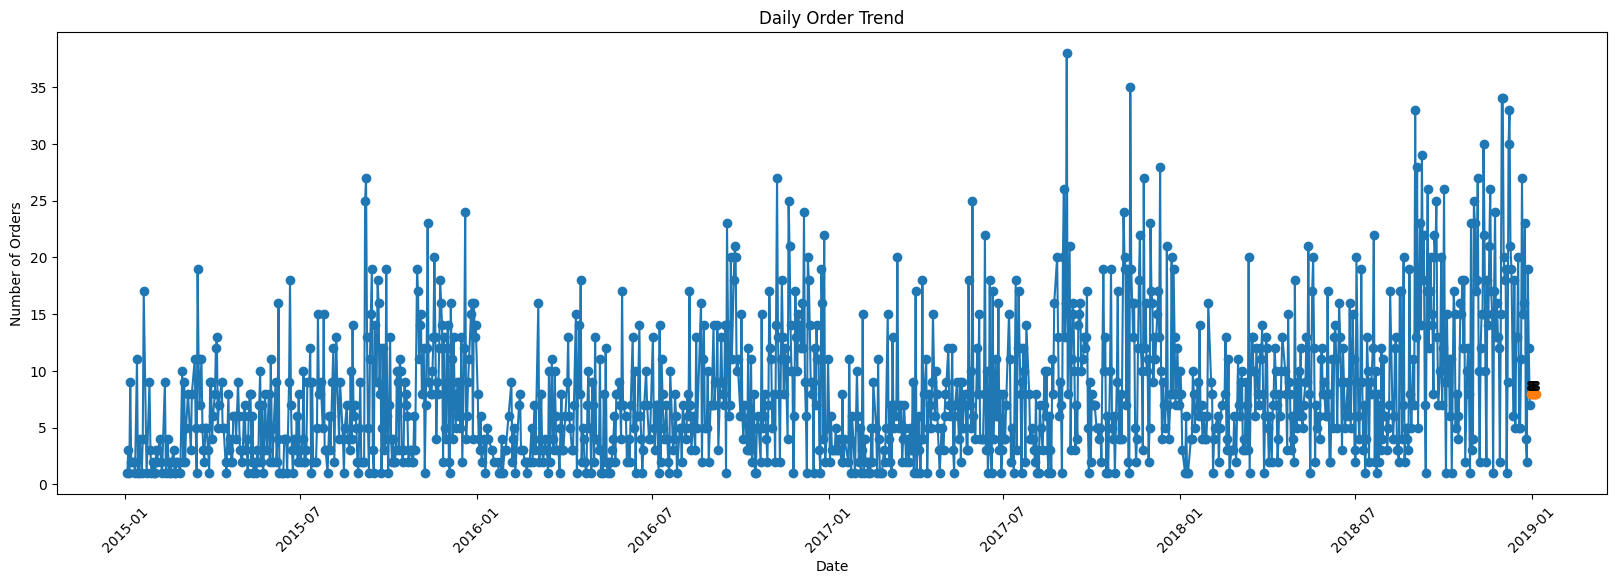

In [53]:
from statsmodels.tsa.arima.model import ARIMA

# Group the data by order date and count the number of orders for each day
daily_orders = df.groupby(df['Order Date'].dt.date)['Order ID'].count()

# Visualize the daily order trend over time
plt.figure(figsize=(20, 6))
plt.plot(daily_orders.index, daily_orders.values, marker='o')
plt.title('Daily Order Trend')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)

# Build an ARIMA model using the historical data
model = ARIMA(daily_orders.values, order=(1, 0, 0))  # Adjust the order as per your data
model_fit = model.fit()

# Make a prediction for the next 7 days
prediction = model_fit.predict(start=len(daily_orders), end=len(daily_orders) + 6)

# Convert the predicted values to whole numbers
prediction = prediction.round().astype(int)

# Generate the dates for the next 7 days
next_7_days = pd.date_range(start=daily_orders.index[-1] + pd.DateOffset(1), periods=7, freq='D')

# Create a DataFrame for the predicted order values
predicted_orders = pd.DataFrame({'Date': next_7_days, 'Predicted Orders': prediction})

# Plot the predicted orders
plt.plot(predicted_orders['Date'], predicted_orders['Predicted Orders'], marker='o')

# Add data value labels on top of each data point
for date, order in zip(predicted_orders['Date'], predicted_orders['Predicted Orders']):
    plt.text(date, order, str(order), ha='center', va='bottom')

# Show the plot
plt.show()

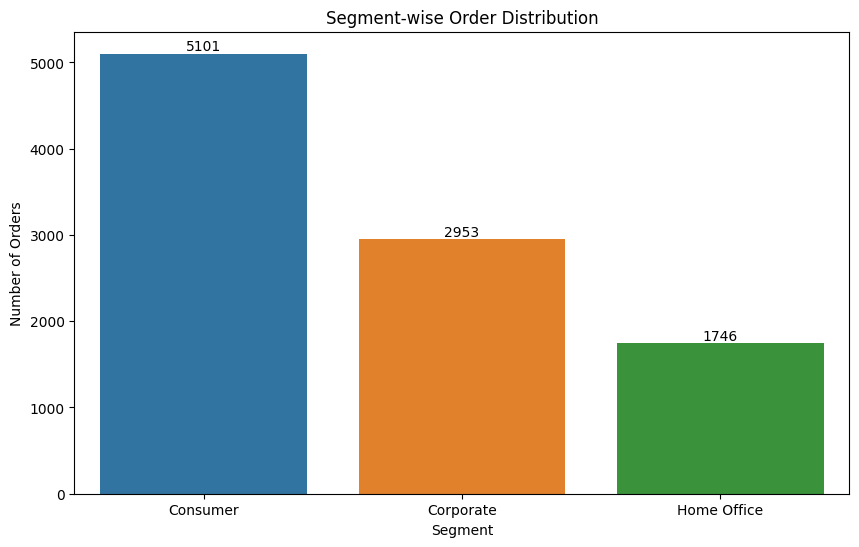

In [61]:
# Group the data by the 'Segment' column and count the number of orders for each segment
segment_orders = df.groupby('Segment')['Order ID'].count().sort_values(ascending=False)

# Create a bar chart to visualize the segment-wise order distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=segment_orders.index, y=segment_orders.values)
plt.title('Segment-wise Order Distribution')
plt.xlabel('Segment')
plt.ylabel('Number of Orders')

# Add data value labels to the chart
for i, value in enumerate(segment_orders.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.show()

In [64]:
from datetime import datetime, timedelta

# Find the segment with the highest number of orders in the dataset
max_segment = segment_orders.idxmax()
print("Segment with the highest number of orders:", max_segment)

# Get the last date in the dataset
last_date = df['Order Date'].max().date()

# Generate the next 7 days of dates
future_dates = pd.date_range(last_date + timedelta(days=1), periods=7, freq='D')

# Predict the segment with orders for the next 1 week
predicted_segment = max_segment
predicted_orders = []

for date in future_dates:
    # Calculate the average orders from the last 7 days for the predicted segment
    average_orders = df[df['Segment'] == predicted_segment].groupby(df['Order Date'].dt.date)['Order ID'].count()[-7:].mean()
    # Add the average orders to the predicted orders list
    predicted_orders.append(round(average_orders))

# Print the predicted segment and the number of orders for each date and weekday
print("Predicted Segment with Orders for the Next 1 Week:")
for i, date in enumerate(future_dates):
    weekday = date.strftime('%A')
    print(f"Date: {date.date()} ({weekday}), Segment: {predicted_segment}, Orders: {predicted_orders[i]}")

Segment with the highest number of orders: Consumer
Predicted Segment with Orders for the Next 1 Week:
Date: 2018-12-31 (Monday), Segment: Consumer, Orders: 7
Date: 2019-01-01 (Tuesday), Segment: Consumer, Orders: 7
Date: 2019-01-02 (Wednesday), Segment: Consumer, Orders: 7
Date: 2019-01-03 (Thursday), Segment: Consumer, Orders: 7
Date: 2019-01-04 (Friday), Segment: Consumer, Orders: 7
Date: 2019-01-05 (Saturday), Segment: Consumer, Orders: 7
Date: 2019-01-06 (Sunday), Segment: Consumer, Orders: 7


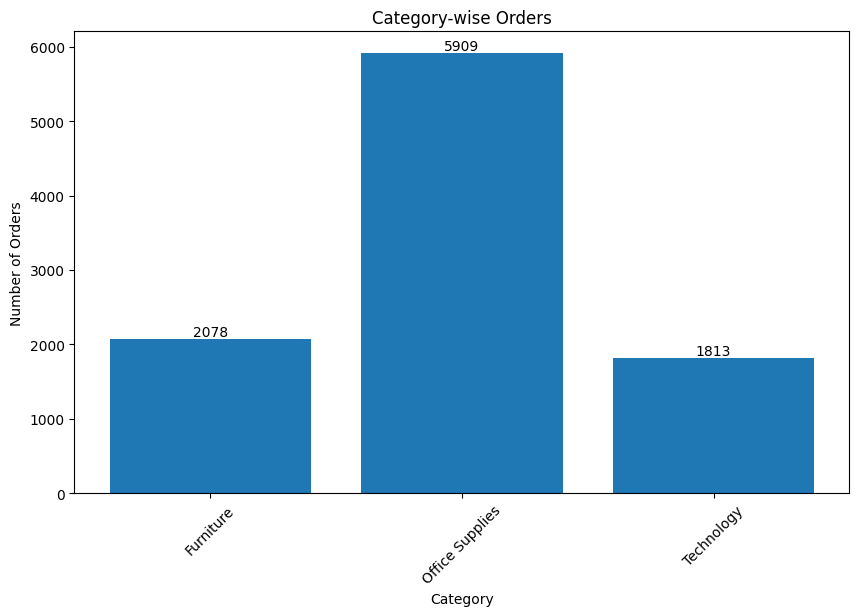

Category with the highest number of orders: Office Supplies
Predicted Category with Orders for the Next 1 Week:
Date: 2018-12-31 (Monday), Category: Office Supplies, Orders: 7
Date: 2019-01-01 (Tuesday), Category: Office Supplies, Orders: 7
Date: 2019-01-02 (Wednesday), Category: Office Supplies, Orders: 7
Date: 2019-01-03 (Thursday), Category: Office Supplies, Orders: 7
Date: 2019-01-04 (Friday), Category: Office Supplies, Orders: 7
Date: 2019-01-05 (Saturday), Category: Office Supplies, Orders: 7
Date: 2019-01-06 (Sunday), Category: Office Supplies, Orders: 7


In [66]:
from datetime import datetime, timedelta

# Group the data by category and count the number of orders
category_orders = df.groupby('Category')['Order ID'].count()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bar chart
plt.bar(category_orders.index, category_orders.values)

# Add data values on top of each bar
for i, value in enumerate(category_orders.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Set the title and labels
plt.title('Category-wise Orders')
plt.xlabel('Category')
plt.ylabel('Number of Orders')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the chart
plt.show()

# Find the category with the highest number of orders in the dataset
max_category = category_orders.idxmax()
print("Category with the highest number of orders:", max_category)

# Get the last date in the dataset
last_date = df['Order Date'].max().date()

# Generate the next 7 days of dates
future_dates = pd.date_range(last_date + timedelta(days=1), periods=7, freq='D')

# Calculate the average orders from the last 7 days for the predicted category
average_orders = df[df['Category'] == max_category].groupby(df['Order Date'].dt.date)['Order ID'].count()[-7:].mean()

# Predict the category with orders for the next 1 week
predicted_category = max_category
predicted_orders = [round(average_orders)] * len(future_dates)

# Print the predicted category and the number of orders for each date and weekday
print("Predicted Category with Orders for the Next 1 Week:")
for i, date in enumerate(future_dates):
    weekday = date.strftime('%A')
    print(f"Date: {date.date()} ({weekday}), Category: {predicted_category}, Orders: {predicted_orders[i]}")

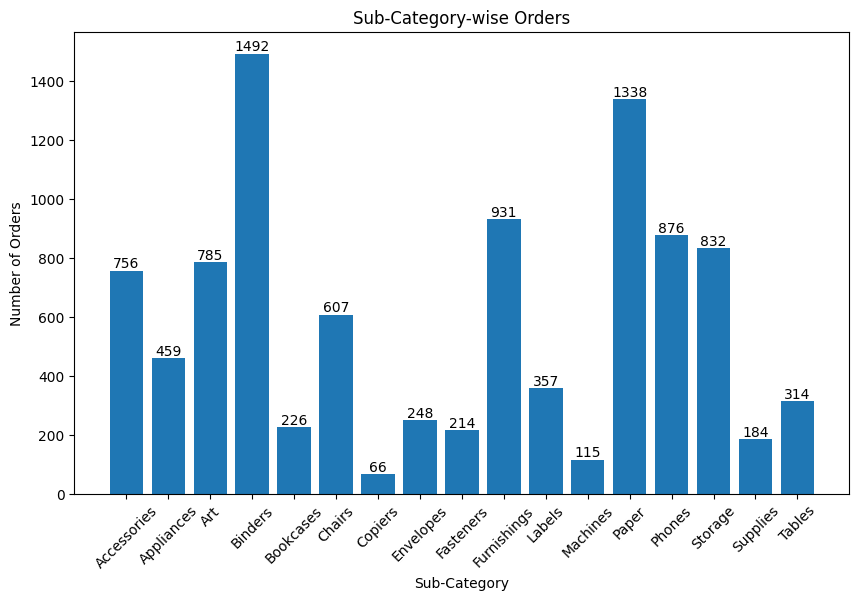

Sub-Category with the highest number of orders: Binders
Predicted Sub-Category with Orders for the Next 1 Week:
Date: 2018-12-31 (Monday), Sub-Category: Binders, Orders: 3
Date: 2019-01-01 (Tuesday), Sub-Category: Binders, Orders: 3
Date: 2019-01-02 (Wednesday), Sub-Category: Binders, Orders: 3
Date: 2019-01-03 (Thursday), Sub-Category: Binders, Orders: 3
Date: 2019-01-04 (Friday), Sub-Category: Binders, Orders: 3
Date: 2019-01-05 (Saturday), Sub-Category: Binders, Orders: 3
Date: 2019-01-06 (Sunday), Sub-Category: Binders, Orders: 3


In [67]:
from datetime import datetime, timedelta

# Group the data by sub-category and count the number of orders
sub_category_orders = df.groupby('Sub-Category')['Order ID'].count()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bar chart
plt.bar(sub_category_orders.index, sub_category_orders.values)

# Add data values on top of each bar
for i, value in enumerate(sub_category_orders.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Set the title and labels
plt.title('Sub-Category-wise Orders')
plt.xlabel('Sub-Category')
plt.ylabel('Number of Orders')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the chart
plt.show()

# Find the sub-category with the highest number of orders in the dataset
max_sub_category = sub_category_orders.idxmax()
print("Sub-Category with the highest number of orders:", max_sub_category)

# Get the last date in the dataset
last_date = df['Order Date'].max().date()

# Generate the next 7 days of dates
future_dates = pd.date_range(last_date + timedelta(days=1), periods=7, freq='D')

# Calculate the average orders from the last 7 days for the predicted sub-category
average_orders = df[df['Sub-Category'] == max_sub_category].groupby(df['Order Date'].dt.date)['Order ID'].count()[-7:].mean()

# Predict the sub-category with orders for the next 1 week
predicted_sub_category = max_sub_category
predicted_orders = [round(average_orders)] * len(future_dates)

# Print the predicted sub-category and the number of orders for each date and weekday
print("Predicted Sub-Category with Orders for the Next 1 Week:")
for i, date in enumerate(future_dates):
    weekday = date.strftime('%A')
    print(f"Date: {date.date()} ({weekday}), Sub-Category: {predicted_sub_category}, Orders: {predicted_orders[i]}")

C:\Users\sialp\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 157 (\x9d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


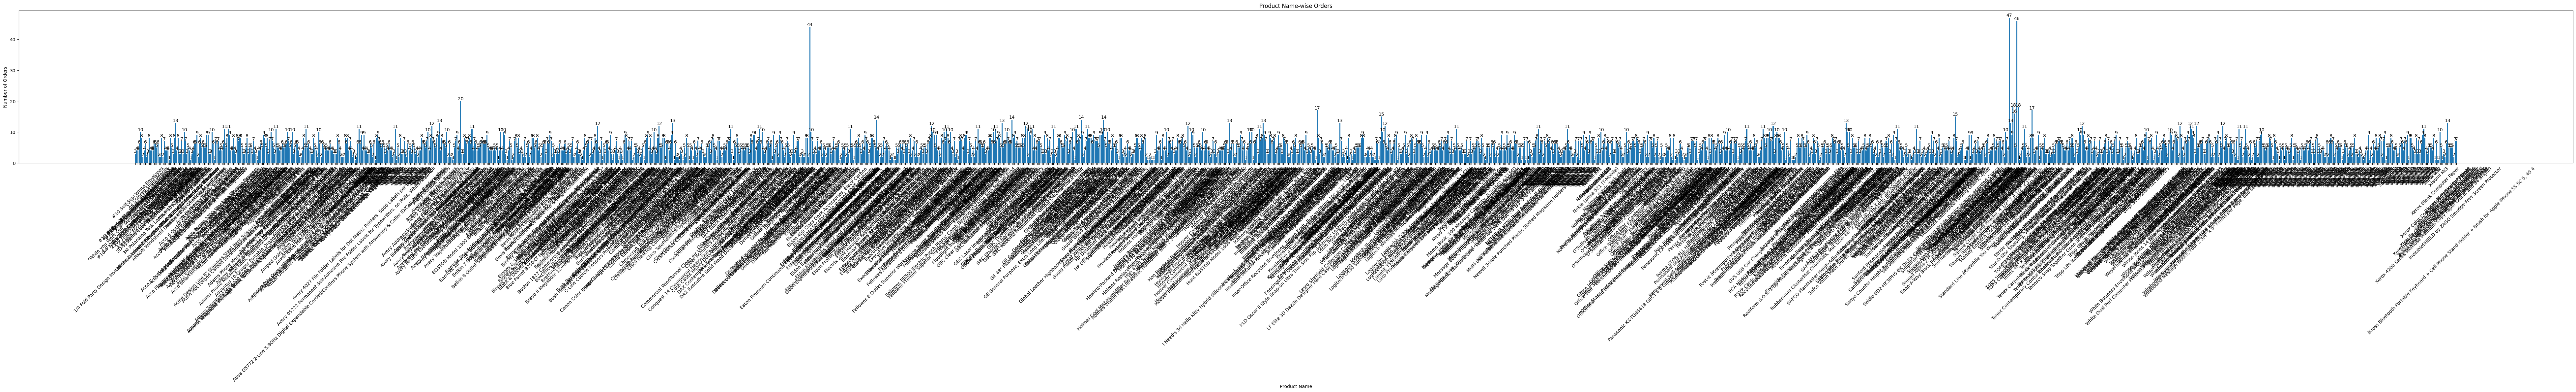

Product Name with the highest number of orders: Staple envelope
Predicted Product Name with Orders for the Next 1 Week:
Date: 2018-12-31 (Monday), Product ID: OFF-EN-10001990, Product Name: Staple envelope, Orders: 1
Date: 2019-01-01 (Tuesday), Product ID: OFF-EN-10001990, Product Name: Staple envelope, Orders: 1
Date: 2019-01-02 (Wednesday), Product ID: OFF-EN-10001990, Product Name: Staple envelope, Orders: 1
Date: 2019-01-03 (Thursday), Product ID: OFF-EN-10001990, Product Name: Staple envelope, Orders: 1
Date: 2019-01-04 (Friday), Product ID: OFF-EN-10001990, Product Name: Staple envelope, Orders: 1
Date: 2019-01-05 (Saturday), Product ID: OFF-EN-10001990, Product Name: Staple envelope, Orders: 1
Date: 2019-01-06 (Sunday), Product ID: OFF-EN-10001990, Product Name: Staple envelope, Orders: 1


In [69]:
from datetime import datetime, timedelta

# Group the data by product name and count the number of orders
product_orders = df.groupby('Product Name')['Order ID'].count()

# Set the figure size
plt.figure(figsize=(100, 6))

# Create the bar chart
plt.bar(product_orders.index, product_orders.values)

# Add data values on top of each bar
for i, value in enumerate(product_orders.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Set the title and labels
plt.title('Product Name-wise Orders')
plt.xlabel('Product Name')
plt.ylabel('Number of Orders')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the chart
plt.show()

# Find the product name with the highest number of orders in the dataset
max_product_name = product_orders.idxmax()
print("Product Name with the highest number of orders:", max_product_name)

# Get the last date in the dataset
last_date = df['Order Date'].max().date()

# Generate the next 7 days of dates
future_dates = pd.date_range(last_date + timedelta(days=1), periods=7, freq='D')

# Calculate the average orders from the last 7 days for the predicted product name
average_orders = df[df['Product Name'] == max_product_name].groupby(df['Order Date'].dt.date)['Order ID'].count()[-7:].mean()

# Predict the product name with orders for the next 1 week
predicted_product_name = max_product_name
predicted_orders = [round(average_orders)] * len(future_dates)

# Print the predicted product name and the number of orders for each date and weekday
print("Predicted Product Name with Orders for the Next 1 Week:")
for i, date in enumerate(future_dates):
    weekday = date.strftime('%A')
    print(f"Date: {date.date()} ({weekday}), Product ID: {df[df['Product Name'] == predicted_product_name]['Product ID'].iloc[0]}, Product Name: {predicted_product_name}, Orders: {predicted_orders[i]}")

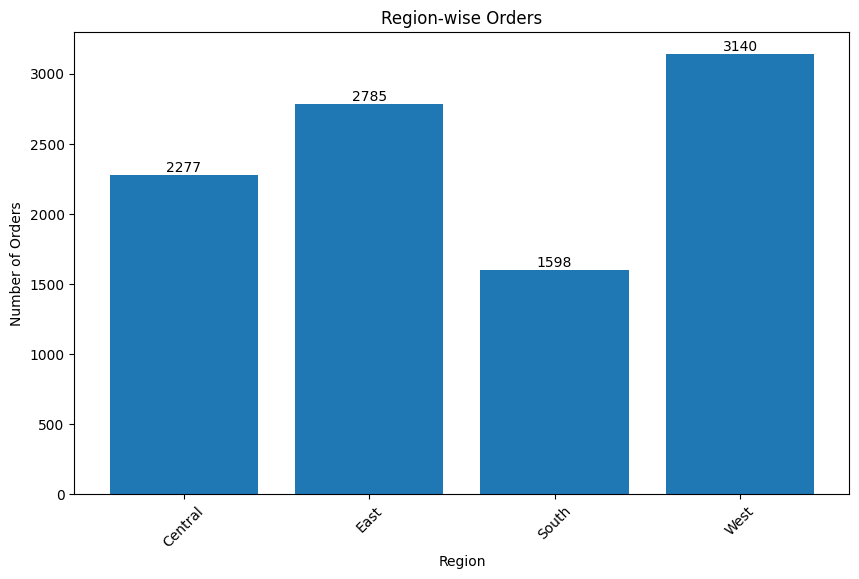

Region with the highest number of orders: West
Predicted Region with Orders for the Next 1 Week:
Date: 2018-12-31 (Monday), Region: West, Orders: 4
Date: 2019-01-01 (Tuesday), Region: West, Orders: 4
Date: 2019-01-02 (Wednesday), Region: West, Orders: 4
Date: 2019-01-03 (Thursday), Region: West, Orders: 4
Date: 2019-01-04 (Friday), Region: West, Orders: 4
Date: 2019-01-05 (Saturday), Region: West, Orders: 4
Date: 2019-01-06 (Sunday), Region: West, Orders: 4


In [70]:
from datetime import datetime, timedelta

# Group the data by region and count the number of orders
region_orders = df.groupby('Region')['Order ID'].count()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bar chart
plt.bar(region_orders.index, region_orders.values)

# Add data values on top of each bar
for i, value in enumerate(region_orders.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Set the title and labels
plt.title('Region-wise Orders')
plt.xlabel('Region')
plt.ylabel('Number of Orders')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the chart
plt.show()

# Find the region with the highest number of orders in the dataset
max_region = region_orders.idxmax()
print("Region with the highest number of orders:", max_region)

# Get the last date in the dataset
last_date = df['Order Date'].max().date()

# Generate the next 7 days of dates
future_dates = pd.date_range(last_date + timedelta(days=1), periods=7, freq='D')

# Calculate the average orders from the last 7 days for the predicted region
average_orders = df[df['Region'] == max_region].groupby(df['Order Date'].dt.date)['Order ID'].count()[-7:].mean()

# Predict the region with orders for the next 1 week
predicted_region = max_region
predicted_orders = [round(average_orders)] * len(future_dates)

# Print the predicted region and the number of orders for each date and weekday
print("Predicted Region with Orders for the Next 1 Week:")
for i, date in enumerate(future_dates):
    weekday = date.strftime('%A')
    print(f"Date: {date.date()} ({weekday}), Region: {predicted_region}, Orders: {predicted_orders[i]}")

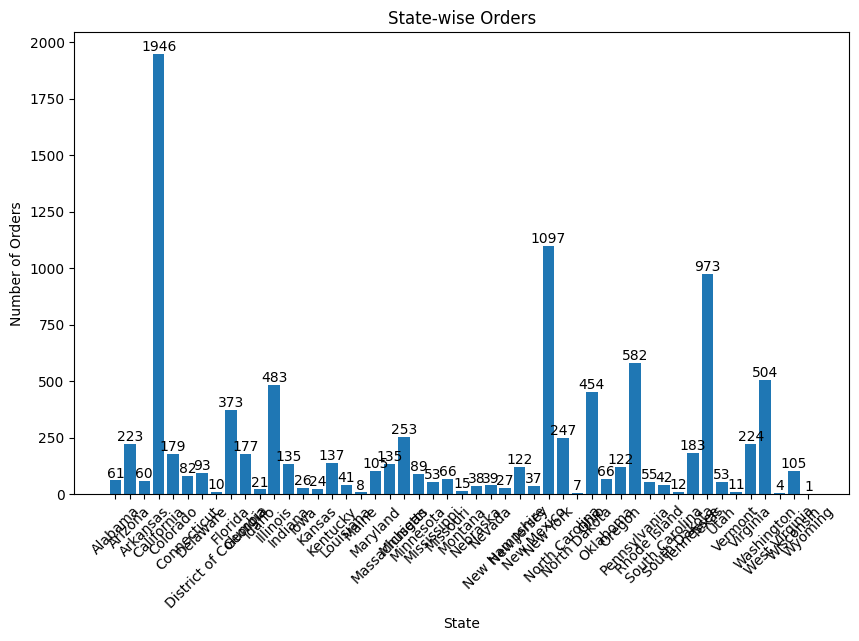

State with the highest number of orders: California
Predicted State with Orders for the Next 1 Week:
Date: 2018-12-31 (Monday), State: California, Orders: 2
Date: 2019-01-01 (Tuesday), State: California, Orders: 2
Date: 2019-01-02 (Wednesday), State: California, Orders: 2
Date: 2019-01-03 (Thursday), State: California, Orders: 2
Date: 2019-01-04 (Friday), State: California, Orders: 2
Date: 2019-01-05 (Saturday), State: California, Orders: 2
Date: 2019-01-06 (Sunday), State: California, Orders: 2


In [72]:
from datetime import datetime, timedelta

# Group the data by state and count the number of orders
state_orders = df.groupby('State')['Order ID'].count()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bar chart
plt.bar(state_orders.index, state_orders.values)

# Add data values on top of each bar
for i, value in enumerate(state_orders.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Set the title and labels
plt.title('State-wise Orders')
plt.xlabel('State')
plt.ylabel('Number of Orders')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the chart
plt.show()

# Find the state with the highest number of orders in the dataset
max_state = state_orders.idxmax()
print("State with the highest number of orders:", max_state)

# Get the last date in the dataset
last_date = df['Order Date'].max().date()

# Generate the next 7 days of dates
future_dates = pd.date_range(last_date + timedelta(days=1), periods=7, freq='D')

# Calculate the average orders from the last 7 days for the predicted state
average_orders = df[df['State'] == max_state].groupby(df['Order Date'].dt.date)['Order ID'].count()[-7:].mean()

# Predict the state with orders for the next 1 week
predicted_state = max_state
predicted_orders = [round(average_orders)] * len(future_dates)

# Print the predicted state and the number of orders for each date and weekday
print("Predicted State with Orders for the Next 1 Week:")
for i, date in enumerate(future_dates):
    weekday = date.strftime('%A')
    print(f"Date: {date.date()} ({weekday}), State: {predicted_state}, Orders: {predicted_orders[i]}")

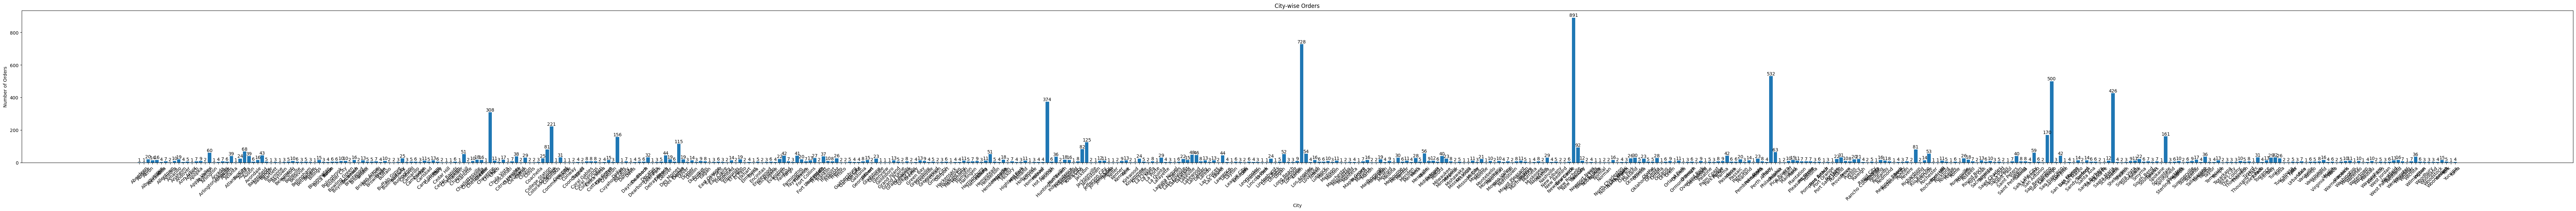

City with the highest number of orders: New York City
Predicted City with Orders for the Next 1 Week:
Date: 2018-12-31 (Monday), City: New York City, Orders: 3
Date: 2019-01-01 (Tuesday), City: New York City, Orders: 3
Date: 2019-01-02 (Wednesday), City: New York City, Orders: 3
Date: 2019-01-03 (Thursday), City: New York City, Orders: 3
Date: 2019-01-04 (Friday), City: New York City, Orders: 3
Date: 2019-01-05 (Saturday), City: New York City, Orders: 3
Date: 2019-01-06 (Sunday), City: New York City, Orders: 3


In [74]:
from datetime import datetime, timedelta

# Group the data by city and count the number of orders
city_orders = df.groupby('City')['Order ID'].count()

# Set the figure size
plt.figure(figsize=(100, 6))

# Create the bar chart
plt.bar(city_orders.index, city_orders.values)

# Add data values on top of each bar
for i, value in enumerate(city_orders.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Set the title and labels
plt.title('City-wise Orders')
plt.xlabel('City')
plt.ylabel('Number of Orders')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the chart
plt.show()

# Find the city with the highest number of orders in the dataset
max_city = city_orders.idxmax()
print("City with the highest number of orders:", max_city)

# Get the last date in the dataset
last_date = df['Order Date'].max().date()

# Generate the next 7 days of dates
future_dates = pd.date_range(last_date + timedelta(days=1), periods=7, freq='D')

# Calculate the average orders from the last 7 days for the predicted city
average_orders = df[df['City'] == max_city].groupby(df['Order Date'].dt.date)['Order ID'].count()[-7:].mean()

# Predict the city with orders for the next 1 week
predicted_city = max_city
predicted_orders = [round(average_orders)] * len(future_dates)

# Print the predicted city and the number of orders for each date and weekday
print("Predicted City with Orders for the Next 1 Week:")
for i, date in enumerate(future_dates):
    weekday = date.strftime('%A')
    print(f"Date: {date.date()} ({weekday}), City: {predicted_city}, Orders: {predicted_orders[i]}")

In [80]:
# Group the data by customer ID and calculate the total purchase value
customer_purchases = df.groupby('Customer ID')['Sales'].sum()

# Sort the customers based on their purchase value in descending order
top_customers = customer_purchases.sort_values(ascending=False).head(5)

# Get the details of the top five customers
top_customers_details = df[df['Customer ID'].isin(top_customers.index)]

# Retrieve the desired information for the top five customers
top_customers_info = top_customers_details.groupby('Customer ID').agg({
    'Customer Name': 'first',
    'Sales': 'sum',
    'Segment': 'first',
    'City': 'first',
    'State': 'first',
    'Postal Code': 'first',
    'Product Name': lambda x: x.value_counts().index[0:5].tolist()
})

# Print the information for the top five customers
print("Top Five Customers:")
for customer_id, row in top_customers_info.iterrows():
    print(f"Customer ID: {customer_id}")
    print(f"Full Name: {row['Customer Name']}")
    print(f"Total Purchase Value: ${row['Sales']:.2f}")
    print(f"Segment: {row['Segment']}")
    print(f"Address: {row['City']}, {row['State']}, {int(row['Postal Code'])}")
    print("Top 5 Product Preferences:")
    for i, product in enumerate(row['Product Name'], 1):
        print(f"{i}. {product}")
    print()

Top Five Customers:
Customer ID: AB-10105
Full Name: Adrian Barton
Total Purchase Value: $14473.57
Segment: Consumer
Address: Phoenix, Arizona, 85023
Top 5 Product Preferences:
1. Bevis Boat-Shaped Conference Table
2. 3M Polarizing Task Lamp with Clamp Arm, Light Gray
3. Canon PC170 Desktop Personal Copier
4. Fellowes Recycled Storage Drawers
5. Avery Recycled Flexi-View Covers for Binding Systems

Customer ID: RB-19360
Full Name: Raymond Buch
Total Purchase Value: $15117.34
Segment: Consumer
Address: Auburn, New York, 13021
Top 5 Product Preferences:
1. Newell 345
2. Fellowes Bankers Box Recycled Super Stor/Drawer
3. Xerox 1898
4. Acco Perma 4000 Stacking Storage Drawers
5. Deflect-O Glasstique Clear Desk Accessories

Customer ID: SM-20320
Full Name: Sean Miller
Total Purchase Value: $25043.05
Segment: Home Office
Address: Monroe, North Carolina, 28110
Top 5 Product Preferences:
1. Xerox 1989
2. Eldon Antistatic Chair Mats for Low to Medium Pile Carpets
3. Hewlett-Packard Deskjet 6540

In [82]:
# Calculate purchase frequency for each customer
purchase_frequency = df.groupby('Customer ID')['Order ID'].count()

# Calculate purchase value for each customer
purchase_value = df.groupby('Customer ID')['Sales'].sum()

# Normalize purchase frequency and purchase value to a scale of 0 to 100
normalized_frequency = (purchase_frequency - purchase_frequency.min()) / (purchase_frequency.max() - purchase_frequency.min()) * 100
normalized_value = (purchase_value - purchase_value.min()) / (purchase_value.max() - purchase_value.min()) * 100

# Calculate potentiality score
potentiality_score = (normalized_frequency + normalized_value) / 2

# Create a dataframe with Customer ID, Customer Name, and Potentiality Score
potential_customers_table = pd.DataFrame({'Customer ID': df['Customer ID'].unique(),
                                          'Customer Name': df.groupby('Customer ID')['Customer Name'].first(),
                                          'Potentiality Score': potentiality_score})

# Sort the table by Potentiality Score in descending order
potential_customers_table = potential_customers_table.sort_values(by='Potentiality Score', ascending=False)

# Retrieve the top 100 potential customers
top_100_potential_customers = potential_customers_table.head(100)

# Print the table
print("Top 100 Potential Customers:")
print(top_100_potential_customers[['Customer ID', 'Customer Name', 'Potentiality Score']].to_string(index=False))

Top 100 Potential Customers:
Customer ID        Customer Name  Potentiality Score
   TS-21505          Sean Miller           70.588235
   CP-12085         Ken Lonsdale           69.474005
   NC-18415          Seth Vernon           68.485467
   BT-11395             John Lee           66.172625
   JL-15175            Greg Tran           64.770976
   BM-11575           Paul Prost           63.002837
   HD-14785        William Brown           62.231057
   MM-18280          Clay Ludtke           61.424108
   SW-20275     Jonathan Doherty           60.777078
   RE-19405     Zuschuss Carroll           60.134910
   BP-11155         Sanjit Chand           59.114197
   CR-12730         Edward Hooks           58.076058
   AI-10855         Matt Abelman           57.104958
   HP-14815        Adrian Barton           56.834484
   EB-13975        Keith Dawkins           56.033768
   FH-14365           Brian Moss           55.732922
   CA-12265          Dean percer           55.542366
   TB-21250      

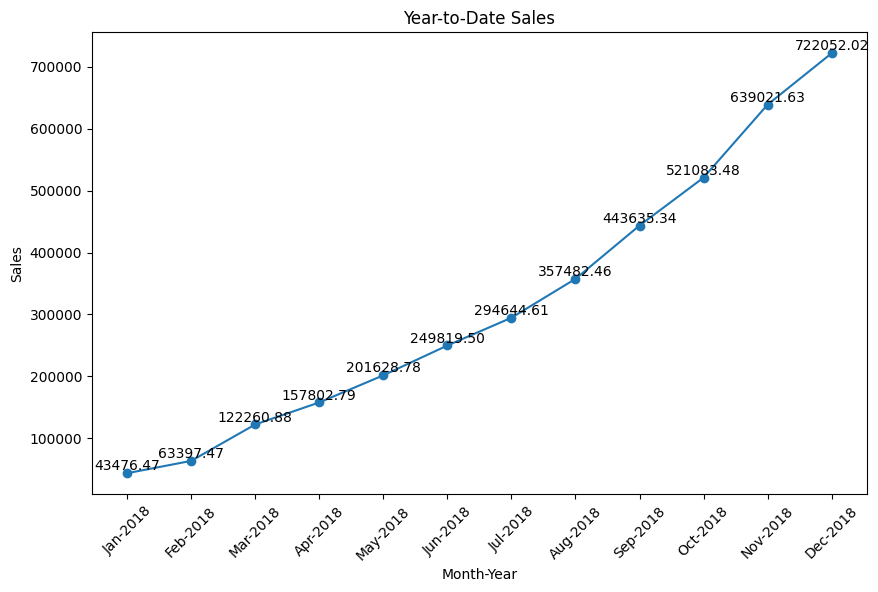

In [83]:
import calendar

# Extract the year and month from the "Order Date" column
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# Filter data for the current year
current_year = df['Year'].max()
ytd_data = df[df['Year'] == current_year]

# Group data by month and calculate total sales for each month
monthly_sales = ytd_data.groupby('Month')['Sales'].sum()

# Calculate YTD sales
ytd_sales = monthly_sales.cumsum()

# Create the month-year labels in the format 'Jan-2023'
month_year_labels = [f"{calendar.month_abbr[month]}-{current_year}" for month in monthly_sales.index]

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the line chart for YTD sales
plt.plot(month_year_labels, ytd_sales, marker='o')

# Add data values on top of each data point
for i, value in enumerate(ytd_sales):
    plt.text(i, value, f"{value:.2f}", ha='center', va='bottom')

# Set the title and labels
plt.title('Year-to-Date Sales')
plt.xlabel('Month-Year')
plt.ylabel('Sales')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the chart
plt.show()

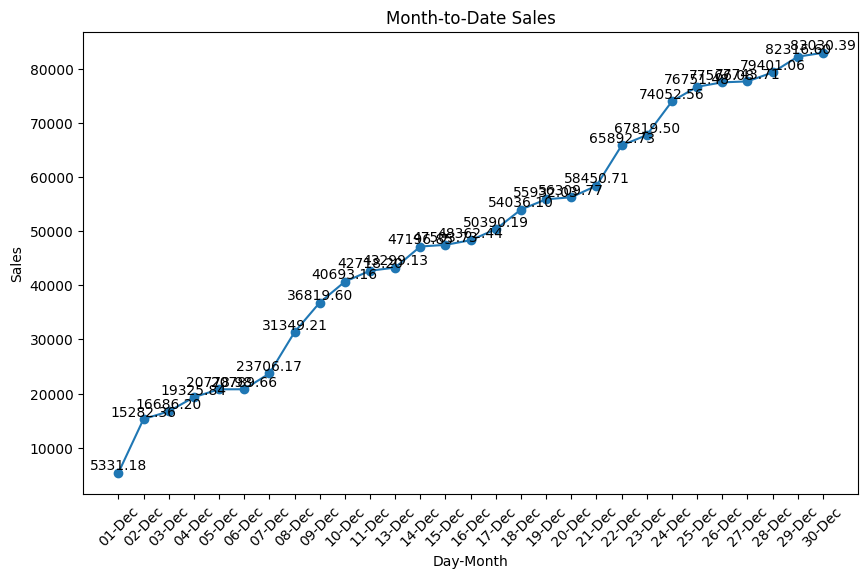

In [84]:
# Extract the year and month from the "Order Date" column
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# Filter data for the current month
current_year = df['Year'].max()
current_month = df['Month'].max()
mtd_data = df[(df['Year'] == current_year) & (df['Month'] == current_month)]

# Group data by day and calculate total sales for each day
daily_sales = mtd_data.groupby(df['Order Date'].dt.day)['Sales'].sum()

# Calculate MTD sales
mtd_sales = daily_sales.cumsum()

# Create the day-month labels in the format '01-Jan'
day_month_labels = [f"{day:02d}-{calendar.month_abbr[current_month]}" for day in daily_sales.index]

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the line chart for MTD sales
plt.plot(day_month_labels, mtd_sales, marker='o')

# Add data values on top of each data point
for i, value in enumerate(mtd_sales):
    plt.text(i, value, f"{value:.2f}", ha='center', va='bottom')

# Set the title and labels
plt.title('Month-to-Date Sales')
plt.xlabel('Day-Month')
plt.ylabel('Sales')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the chart
plt.show()

In [86]:
# Group the data by segment and calculate the sum of sales
segment_sales = df.groupby('Segment')['Sales'].sum()

# Sort the segment sales in descending order
segment_sales = segment_sales.sort_values(ascending=False)

# Convert the sales values to USD format
segment_sales_usd = segment_sales.apply(lambda x: f"${x:.2f}")

# Print the sales by segment in USD
print("Sales by Segment (USD):\n")
print(segment_sales_usd)

Sales by Segment (USD):

Segment
Consumer       $1148060.53
Corporate       $688494.07
Home Office     $424982.18
Name: Sales, dtype: object


In [87]:
# Extract the year from the 'Order Date' column
df['Year'] = df['Order Date'].dt.year

# Group the data by year and calculate the sum of sales
yearly_sales = df.groupby('Year')['Sales'].sum()

# Sort the yearly sales in descending order
yearly_sales = yearly_sales.sort_values(ascending=False)

# Convert the sales values to USD format
yearly_sales_usd = yearly_sales.apply(lambda x: f"${x:.2f}")

# Print the sales by year in USD
print("Sales by Year (USD):\n")
print(yearly_sales_usd)

Sales by Year (USD):

Year
2018    $722052.02
2017    $600192.55
2015    $479856.21
2016    $459436.01
Name: Sales, dtype: object


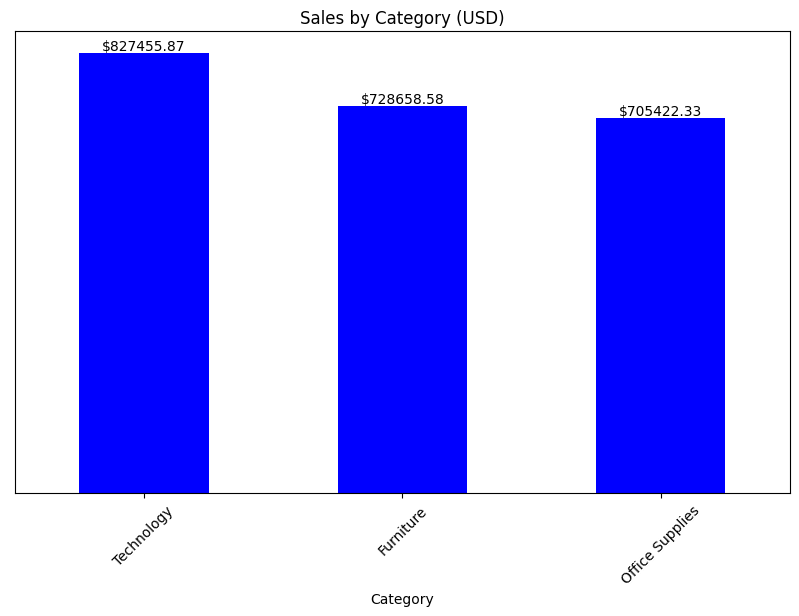

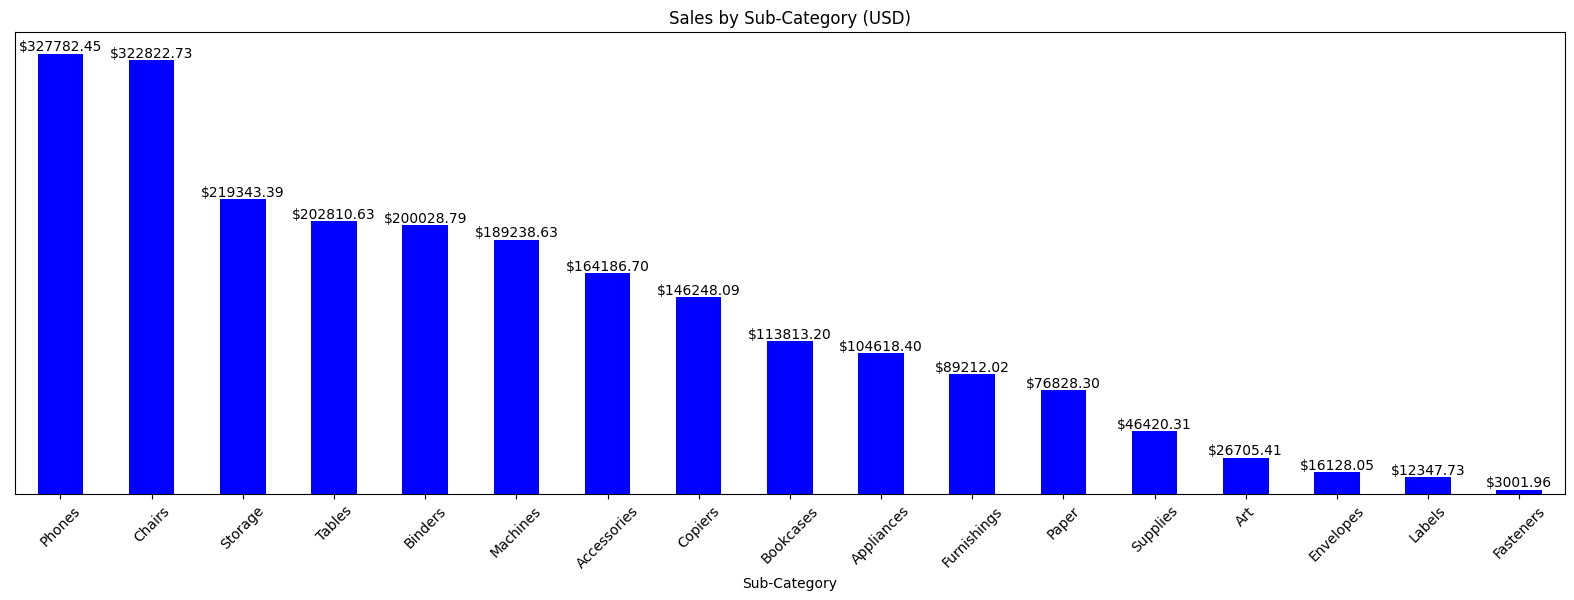

In [93]:
# Group the data by category and calculate the sum of sales
category_sales = df.groupby('Category')['Sales'].sum()

# Sort the category sales in descending order
category_sales = category_sales.sort_values(ascending=False)

# Convert the sales values to USD format
category_sales_usd = category_sales.apply(lambda x: f"${x:.2f}")

# Plot the sales by category
plt.figure(figsize=(10, 6))
category_sales.plot(kind='bar', color='blue')

# Add data values on top of each bar
for i, value in enumerate(category_sales.values):
    plt.text(i, value, str(category_sales_usd[i]), ha='center', va='bottom')

# Set the title and labels
plt.title('Sales by Category (USD)')
plt.xlabel('Category')
plt.ylabel('Sales')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Hide the y-axis
plt.gca().axes.get_yaxis().set_visible(False)

# Display the chart
plt.show()

# Group the data by sub-category and calculate the sum of sales
sub_category_sales = df.groupby('Sub-Category')['Sales'].sum()

# Sort the sub-category sales in descending order
sub_category_sales = sub_category_sales.sort_values(ascending=False)

# Convert the sales values to USD format
sub_category_sales_usd = sub_category_sales.apply(lambda x: f"${x:.2f}")

# Plot the sales by sub-category
plt.figure(figsize=(20, 6))
sub_category_sales.plot(kind='bar', color='blue')

# Add data values on top of each bar
for i, value in enumerate(sub_category_sales.values):
    plt.text(i, value, str(sub_category_sales_usd[i]), ha='center', va='bottom')

# Set the title and labels
plt.title('Sales by Sub-Category (USD)')
plt.xlabel('Sub-Category')
plt.ylabel('Sales')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Hide the y-axis
plt.gca().axes.get_yaxis().set_visible(False)

# Display the chart
plt.show()

In [94]:
# Compute the sales statistics
sales_mean = df['Sales'].mean()
sales_median = df['Sales'].median()
sales_min = df['Sales'].min()
sales_max = df['Sales'].max()
sales_std = df['Sales'].std()

# Print the sales statistics
print("Sales Statistics:")
print("Mean: $", round(sales_mean, 2))
print("Median: $", round(sales_median, 2))
print("Minimum: $", round(sales_min, 2))
print("Maximum: $", round(sales_max, 2))
print("Standard Deviation: $", round(sales_std, 2))

Sales Statistics:
Mean: $ 230.77
Median: $ 54.49
Minimum: $ 0.44
Maximum: $ 22638.48
Standard Deviation: $ 626.65


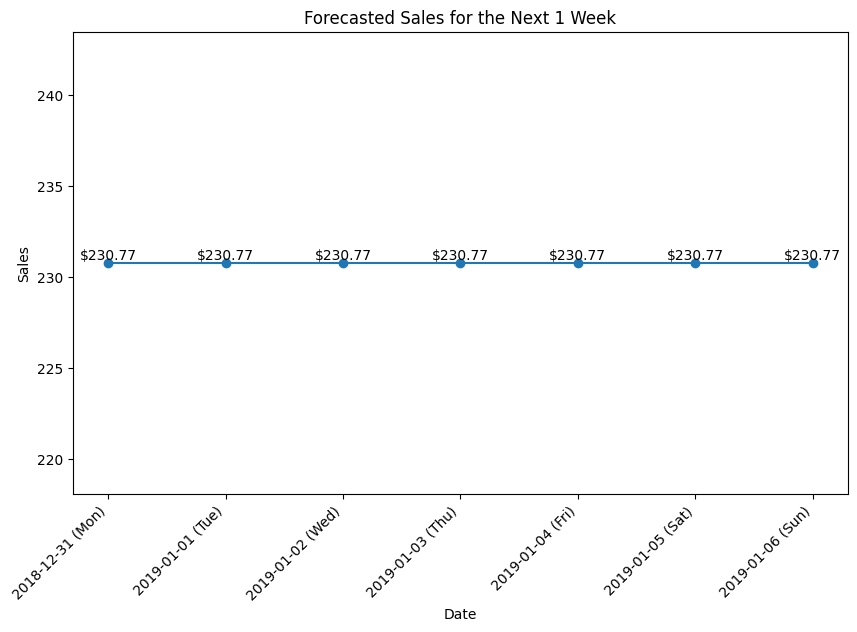

In [96]:
from datetime import datetime, timedelta
import matplotlib.dates as mdates

# Extract the date range for the next 1 week
start_date = df['Order Date'].max().date() + timedelta(days=1)
end_date = start_date + timedelta(days=6)
date_range = pd.date_range(start_date, end_date, freq='D')

# Perform exponential smoothing forecast
alpha = 0.2  # Smoothing factor
sales_forecast = [df['Sales'].mean()]  # Initial forecast value

for i in range(len(date_range)-1):
    forecast = alpha * df.loc[df['Order Date'] < date_range[i], 'Sales'].mean() + (1 - alpha) * sales_forecast[i]
    sales_forecast.append(forecast)

# Convert forecasted sales to a pandas Series for plotting
forecasted_sales = pd.Series(sales_forecast, index=date_range)

# Set up the plot
plt.figure(figsize=(10, 6))
plt.plot(forecasted_sales.index, forecasted_sales.values, marker='o')

# Add data value labels on top of each data point
for i, value in enumerate(forecasted_sales.values):
    plt.text(forecasted_sales.index[i], value, f"${value:.2f}", ha='center', va='bottom')

# Set the title and labels
plt.title('Forecasted Sales for the Next 1 Week')
plt.xlabel('Date')
plt.ylabel('Sales')

# Format x-axis tick labels to display date and day name
plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d (%a)'))

# Show the plot
plt.show()

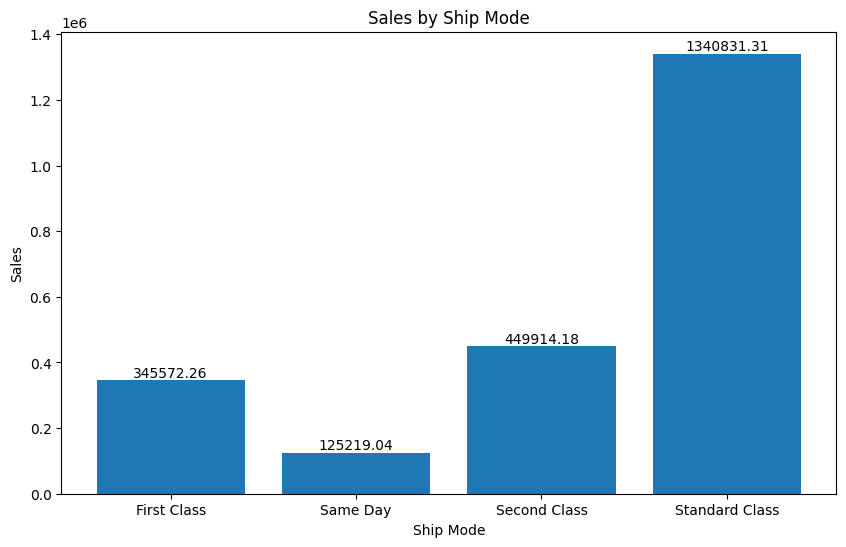

In [100]:
# Group the data by ship mode and calculate total sales
sales_by_ship_mode = df.groupby('Ship Mode')['Sales'].sum()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(sales_by_ship_mode.index, sales_by_ship_mode.values)

# Add data labels on top of each bar
for i, value in enumerate(sales_by_ship_mode.values):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')

# Set the title and labels
plt.title('Sales by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Sales')

# Show the chart
plt.show()

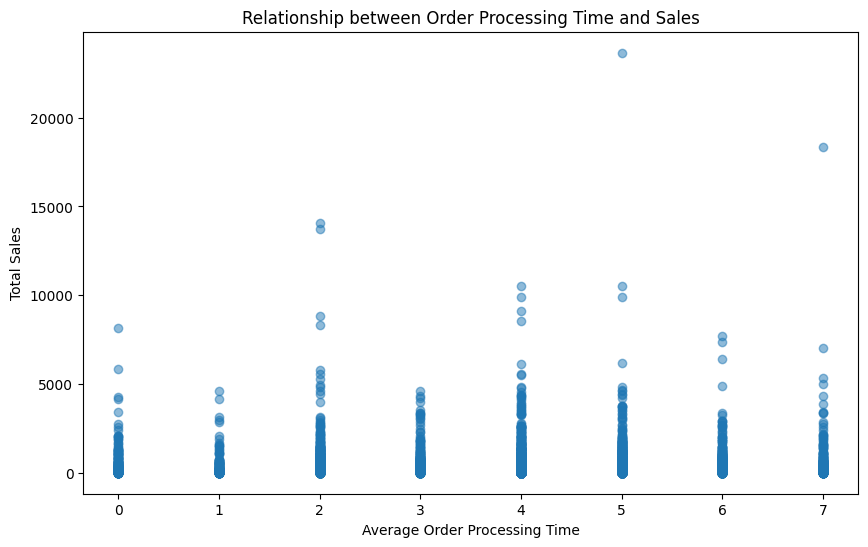

In [101]:
# Calculate average order processing time for each order
average_processing_time = df.groupby('Order ID')['Order Processing Time'].mean()

# Calculate total sales for each order
total_sales = df.groupby('Order ID')['Sales'].sum()

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
plt.scatter(average_processing_time, total_sales, alpha=0.5)
plt.xlabel('Average Order Processing Time')
plt.ylabel('Total Sales')
plt.title('Relationship between Order Processing Time and Sales')
plt.show()

In [102]:
import pandas as pd

# Assuming you have a DataFrame named 'df' containing customer information and purchase data

# Calculate total purchase value by customer
customer_purchase_value = df.groupby('Customer ID')['Sales'].sum()

# Calculate purchase frequency by customer
customer_purchase_frequency = df.groupby('Customer ID')['Order ID'].nunique()

# Calculate recency of purchase by customer
customer_last_purchase = df.groupby('Customer ID')['Order Date'].max()
current_date = pd.to_datetime('today')
customer_recency = (current_date - customer_last_purchase).dt.days

# Create a DataFrame to store the customer segmentation
customer_segmentation = pd.DataFrame({
    'Total Purchase Value': customer_purchase_value,
    'Purchase Frequency': customer_purchase_frequency,
    'Recency': customer_recency
})

# Segment customers based on their purchase behavior
# Define the criteria for segmentation based on your specific business needs
customer_segmentation['Segment'] = pd.cut(
    x=customer_segmentation['Total Purchase Value'],
    bins=[0, 1000, 5000, float('inf')],
    labels=['Low-Value', 'Mid-Value', 'High-Value']
)

# Print the segmented customers
print(customer_segmentation)

             Total Purchase Value  Purchase Frequency  Recency     Segment
Customer ID                                                               
AA-10315                 5563.560                   5     1819  High-Value
AA-10375                 1056.390                   9     1654   Mid-Value
AA-10480                 1790.512                   4     1894   Mid-Value
AA-10645                 5086.935                   6     1690  High-Value
AB-10015                  886.156                   3     2050   Low-Value
...                           ...                 ...      ...         ...
XP-21865                 2374.658                  11     1678   Mid-Value
YC-21895                 5454.350                   5     1639  High-Value
YS-21880                 6720.444                   8     1644  High-Value
ZC-21910                 8025.707                  13     1689  High-Value
ZD-21925                 1493.944                   5     1837   Mid-Value

[793 rows x 4 columns]


In [107]:
# Calculate the total purchase value by customer
customer_purchase_value = df.groupby('Customer ID')['Sales'].sum()

# Calculate the purchase frequency by customer
customer_purchase_frequency = df.groupby('Customer ID')['Order ID'].nunique()

# Calculate the average purchase value per transaction
avg_purchase_value = customer_purchase_value / customer_purchase_frequency

# Calculate the CLV
clv = avg_purchase_value * customer_purchase_frequency

# Create a DataFrame to store the customer CLV
customer_clv = pd.DataFrame({
    'Customer ID': customer_purchase_value.index,
    'Customer Name': df.groupby('Customer ID')['Customer Name'].first(),
    'CLV': clv
})

# Sort the customers by CLV in descending order
customer_clv = customer_clv.sort_values('CLV', ascending=False)

# Print the top 10 customers by CLV in a table format
top_10_customers = customer_clv.head(10)
top_10_customers = top_10_customers.round({'CLV': 1})
print(top_10_customers)

            Customer ID       Customer Name      CLV
Customer ID                                         
SM-20320       SM-20320         Sean Miller  25043.0
TC-20980       TC-20980        Tamara Chand  19052.2
RB-19360       RB-19360        Raymond Buch  15117.3
TA-21385       TA-21385        Tom Ashbrook  14595.6
AB-10105       AB-10105       Adrian Barton  14473.6
KL-16645       KL-16645        Ken Lonsdale  14175.2
SC-20095       SC-20095        Sanjit Chand  14142.3
HL-15040       HL-15040        Hunter Lopez  12873.3
SE-20110       SE-20110        Sanjit Engle  12209.4
CC-12370       CC-12370  Christopher Conant  12129.1
